In [16]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [17]:
# Import the request library.
import requests

# Import the API key.
from config import weather_api_keys

In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9d8f7c112632932f862961cceb1956eb


In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [22]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
   

Processing Record 25 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 26 of Set 13 | kapaa
Processing Record 27 of Set 13 | pisco
Processing Record 28 of Set 13 | rikitea
Processing Record 29 of Set 13 | yellowknife
Processing Record 30 of Set 13 | warri
Processing Record 31 of Set 13 | castro
Processing Record 32 of Set 13 | mataura
Processing Record 33 of Set 13 | hobart
Processing Record 34 of Set 13 | tamandare
Processing Record 35 of Set 13 | hilo
Processing Record 36 of Set 13 | caravelas
Processing Record 37 of Set 13 | longyearbyen
Processing Record 38 of Set 13 | vostok
Processing Record 39 of Set 13 | san jose
Processing Record 40 of Set 13 | san patricio
Processing Record 41 of Set 13 | karratha
Processing Record 42 of Set 13 | beyneu
Processing Record 43 of Set 13 | lebu
Processing Record 44 of Set 13 | mahebourg
Processing Record 45 of Set 13 | kavieng
Processing Record 46 of Set 13 | killybegs
Processing Record 47 of Set 13 | new norfolk
Processing Reco

Processing Record 34 of Set 16 | constitucion
Processing Record 35 of Set 16 | pevek
Processing Record 36 of Set 16 | san quintin
Processing Record 37 of Set 16 | te anau
Processing Record 38 of Set 16 | xining
Processing Record 39 of Set 16 | beawar
Processing Record 40 of Set 16 | oskemen
Processing Record 41 of Set 16 | puerto madryn
Processing Record 42 of Set 16 | guymon
Processing Record 43 of Set 16 | wucheng
Processing Record 44 of Set 16 | muzhi
Processing Record 45 of Set 16 | banjar
Processing Record 46 of Set 16 | viedma
Processing Record 47 of Set 16 | birao
Processing Record 48 of Set 16 | codrington
Processing Record 49 of Set 16 | chokurdakh
Processing Record 50 of Set 16 | serebryansk
Processing Record 1 of Set 17 | namibe
Processing Record 2 of Set 17 | pecos
Processing Record 3 of Set 17 | sokoni
Processing Record 4 of Set 17 | crab hill
City not found. Skipping...
Processing Record 5 of Set 17 | guerrero negro
Processing Record 6 of Set 17 | manali
Processing Record

Processing Record 21 of Set 20 | flinders
Processing Record 22 of Set 20 | cayambe
Processing Record 23 of Set 20 | saldanha
Processing Record 24 of Set 20 | leningradskiy
Processing Record 25 of Set 20 | jiwani
Processing Record 26 of Set 20 | snihurivka
Processing Record 27 of Set 20 | sao paulo do potengi
Processing Record 28 of Set 20 | atar
Processing Record 29 of Set 20 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 30 of Set 20 | palana
Processing Record 31 of Set 20 | neuquen
Processing Record 32 of Set 20 | greymouth
Processing Record 33 of Set 20 | tura
Processing Record 34 of Set 20 | taguatinga
Processing Record 35 of Set 20 | half moon bay
Processing Record 36 of Set 20 | basco
Processing Record 37 of Set 20 | kota bahru
Processing Record 38 of Set 20 | kayerkan
Processing Record 39 of Set 20 | port hedland
Processing Record 40 of Set 20 | severomuysk
Processing Record 41 of Set 20 | kaitangata
Processing Record 42 of Set 20 | buraydah
Processing Reco

Processing Record 8 of Set 24 | kiruna
Processing Record 9 of Set 24 | benicarlo
Processing Record 10 of Set 24 | acapulco
Processing Record 11 of Set 24 | santiago
Processing Record 12 of Set 24 | nakusp
Processing Record 13 of Set 24 | hella
Processing Record 14 of Set 24 | bani walid
Processing Record 15 of Set 24 | la serena
Processing Record 16 of Set 24 | agadez
Processing Record 17 of Set 24 | bridlington
Processing Record 18 of Set 24 | palmaner
Processing Record 19 of Set 24 | nantucket
Processing Record 20 of Set 24 | north bend
Processing Record 21 of Set 24 | petropavlovsk-kamchatskiy
Processing Record 22 of Set 24 | skjervoy
Processing Record 23 of Set 24 | calabar
Processing Record 24 of Set 24 | pangody
Processing Record 25 of Set 24 | stockbridge
Processing Record 26 of Set 24 | oranjemund
Processing Record 27 of Set 24 | teguldet
Processing Record 28 of Set 24 | miramar
Processing Record 29 of Set 24 | sao pedro do sul
Processing Record 30 of Set 24 | ust-kamchatsk
Cit

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,72.00,88,90,26.46,US,2021-03-18 11:55:55
1,Pisco,-13.7000,-76.2167,66.20,77,90,3.44,PE,2021-03-18 11:55:55
2,Rikitea,-23.1203,-134.9692,76.44,84,100,17.36,PF,2021-03-18 11:55:56
3,Yellowknife,62.4560,-114.3525,12.20,85,1,10.36,CA,2021-03-18 11:50:56
4,Warri,5.5167,5.7500,91.99,50,90,5.84,NG,2021-03-18 11:55:56
5,Castro,-24.7911,-50.0119,65.75,94,98,2.71,BR,2021-03-18 11:55:56
6,Mataura,-46.1927,168.8643,52.00,87,25,4.00,NZ,2021-03-18 11:55:56
7,Hobart,-42.8794,147.3294,61.00,77,20,5.75,AU,2021-03-18 11:53:26
8,Tamandare,-8.7597,-35.1047,82.98,66,35,6.93,BR,2021-03-18 11:55:57
9,Hilo,19.7297,-155.0900,68.00,83,90,5.75,US,2021-03-18 11:55:57


In [30]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-03-18 11:55:55,22.0752,-159.3190,72.00,88,90,26.46
1,Pisco,PE,2021-03-18 11:55:55,-13.7000,-76.2167,66.20,77,90,3.44
2,Rikitea,PF,2021-03-18 11:55:56,-23.1203,-134.9692,76.44,84,100,17.36
3,Yellowknife,CA,2021-03-18 11:50:56,62.4560,-114.3525,12.20,85,1,10.36
4,Warri,NG,2021-03-18 11:55:56,5.5167,5.7500,91.99,50,90,5.84
...,...,...,...,...,...,...,...,...,...
567,Kizema,RU,2021-03-18 11:58:08,61.1130,44.8302,30.63,92,100,5.75
568,Jiangyou,CN,2021-03-18 11:58:09,31.7667,104.7167,65.88,71,100,5.19
569,High Level,CA,2021-03-18 11:58:09,58.5169,-117.1360,24.80,80,1,10.36
570,Pitimbu,BR,2021-03-18 11:58:09,-7.4706,-34.8086,73.40,100,90,11.50


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

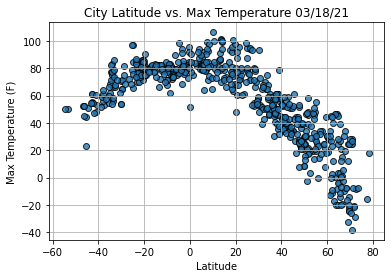

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

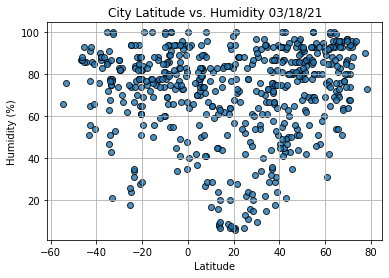

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

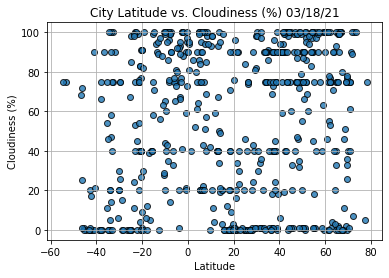

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

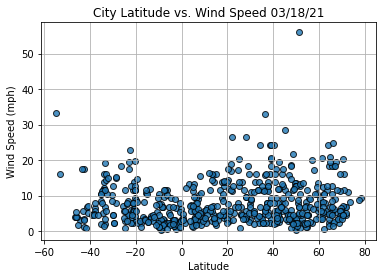

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()